In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# K- means 
About the Data Set

This dataset comes from the daily measures of sensors in an urban wastewater treatment plant. We have all nummaric and continious data type but there are some missing value with "?" in it. 

Objective 

The aim is to classify the operational state of the plant using clustering techniques in order to predict faults through the state variables of the plant at each of the stages of the treatment process. Base on the Silhouette Score we will determine the optimum number of cluster for our case. 

In [2]:
#Read the dataset in a variable named “df”
df = pd.read_csv("C:/Users/soukh/Downloads/Data Analytics/water-treatment.csv")

In [3]:
#print the top 5 rows with labels 
df.head()

,ID,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SSED-G
0,D-1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,D-2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5


In [4]:
#show the column name 
df.columns

Index(['ID', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E',
       'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D',
       'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
       'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P',
       'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G',
       'RD-SSED-G'],
      dtype='object')

In [5]:
# Number of unique in each column
df.nunique()

ID           527
Q-E          504
ZN-E         169
PH-E          16
DBO-E        205
DQO-E        289
SS-E         142
SSV-E        275
SED-E         60
COND-E       414
PH-P          13
DBO-P        226
SS-P         154
SSV-P        285
SED-P         63
COND-P       412
PH-D          13
DBO-D        149
DQO-D        230
SS-D          75
SSV-D        243
SED-D         23
COND-D       410
PH-S          16
DBO-S         44
DQO-S        137
SS-S          58
SSV-S        193
SED-S         18
COND-S       413
RD-DBO-P     315
RD-SS-P      308
RD-SED-P     144
RD-DBO-S     185
RD-DQO-S     265
RD-DBO-G     156
RD-DQO-G     230
RD-SS-G      183
RD-SSED-G     41
dtype: int64

In [6]:
# number of rowsxcolumn 
df.shape #rows=527 and Column=39

(527, 39)

In [7]:
df.head()

,ID,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SSED-G
0,D-1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,D-2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5


In [8]:
# Number of Black Cell 
df.isna().sum() # no black cell 

ID           0
Q-E          0
ZN-E         0
PH-E         0
DBO-E        0
DQO-E        0
SS-E         0
SSV-E        0
SED-E        0
COND-E       0
PH-P         0
DBO-P        0
SS-P         0
SSV-P        0
SED-P        0
COND-P       0
PH-D         0
DBO-D        0
DQO-D        0
SS-D         0
SSV-D        0
SED-D        0
COND-D       0
PH-S         0
DBO-S        0
DQO-S        0
SS-S         0
SSV-S        0
SED-S        0
COND-S       0
RD-DBO-P     0
RD-SS-P      0
RD-SED-P     0
RD-DBO-S     0
RD-DQO-S     0
RD-DBO-G     0
RD-DQO-G     0
RD-SS-G      0
RD-SSED-G    0
dtype: int64

In [9]:
#Number of "?" in each column 
list = df.columns

for i in list:
    print(i,"--->",len(df[df[i]=="?"]))

ID ---> 0
Q-E ---> 18
ZN-E ---> 3
PH-E ---> 0
DBO-E ---> 23
DQO-E ---> 6
SS-E ---> 1
SSV-E ---> 11
SED-E ---> 25
COND-E ---> 0
PH-P ---> 0
DBO-P ---> 40
SS-P ---> 0
SSV-P ---> 11
SED-P ---> 24
COND-P ---> 0
PH-D ---> 0
DBO-D ---> 28
DQO-D ---> 9
SS-D ---> 2
SSV-D ---> 13
SED-D ---> 25
COND-D ---> 0
PH-S ---> 1
DBO-S ---> 23
DQO-S ---> 18
SS-S ---> 5
SSV-S ---> 17
SED-S ---> 28
COND-S ---> 1
RD-DBO-P ---> 62
RD-SS-P ---> 4
RD-SED-P ---> 27
RD-DBO-S ---> 40
RD-DQO-S ---> 26
RD-DBO-G ---> 36
RD-DQO-G ---> 25
RD-SS-G ---> 8
RD-SSED-G ---> 31


In [10]:
#for col in df.columns:
 #   df[col] = df[col].replace('?', '')

#print(df)

In [11]:
#Import Mode for imputatation in place of "?" 
import statistics
from scipy.stats import mode# as there are more than 5% data missing value row(?) we can not drop all the rows

In [12]:
df.columns

Index(['ID', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E',
       'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D',
       'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
       'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P',
       'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G',
       'RD-SSED-G'],
      dtype='object')

In [13]:
#'ID', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E',
       #'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D',
       #'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
       #'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P',
       #'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G',
       #'RD-SSED-G'],
    
#columns_list = df.columns

#for col in columns_list:
  #  df[col] = df[col].replace('?', statistics.mode(df[col]))

    
columns_list = df.columns

for col in columns_list:
    # Convert '?' to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calculate mode (handling NaN values)
    mode_value = mode(df[col], nan_policy='omit').mode[0]

    # Replace NaN values with the mode
    df[col] = np.where(pd.isna(df[col]), mode_value, df[col])



In [14]:
# Check if all the modes are there in place of "?"
df.head(10)

,ID,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SSED-G
0,0.0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110,...,2000.0,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
1,0.0,39024.0,3.0,7.7,133.0,443.0,214.0,69.2,6.5,2660,...,2590.0,36.9,60.7,94.8,85.5,80.8,90.3,79.5,92.1,100.0
2,0.0,32229.0,5.0,7.6,133.0,528.0,186.0,69.9,3.4,1666,...,1888.0,36.9,58.2,95.6,85.5,52.9,90.3,75.8,88.7,98.5
3,0.0,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,0.0,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5
5,0.0,38572.0,3.0,7.8,202.0,372.0,186.0,68.8,4.5,1644,...,1764.0,36.9,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0
6,0.0,41115.0,6.0,7.8,133.0,552.0,262.0,64.1,5.0,1603,...,1703.0,36.9,61.9,93.8,89.1,79.8,90.3,86.2,90.1,99.0
7,0.0,36107.0,5.0,7.7,215.0,489.0,334.0,40.7,6.0,1613,...,1606.0,36.9,70.4,95.6,90.6,53.7,92.1,66.9,94.6,100.0
8,0.0,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,0.0,39246.0,2.0,7.8,172.0,506.0,200.0,69.0,5.0,1865,...,1616.0,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6


In [15]:
# Drop ID as it is not required 
df=df.drop(['ID'],axis=1)
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SSED-G
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
1,39024.0,3.0,7.7,133.0,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,36.9,60.7,94.8,85.5,80.8,90.3,79.5,92.1,100.0
2,32229.0,5.0,7.6,133.0,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,36.9,58.2,95.6,85.5,52.9,90.3,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5


In [16]:
# Perfrom Standard Scaling Operation   
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_cols_ss=['Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E',
       'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D',
       'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S',
       'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P',
       'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G',
       'RD-SSED-G']
df[num_cols_ss]=ss.fit_transform(df[num_cols_ss])
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SSED-G
0,1.071012,-0.310595,-0.040892,-0.863685,0.003411,-0.452011,0.390030,-0.033405,1.600361,0.308849,...,1.305204,-0.138767,0.027103,0.550734,0.223813,0.166182,0.176657,0.152272,-0.209163,0.106348
1,0.309466,0.236658,-0.447493,-0.863685,0.304427,-0.098300,0.625869,0.714125,2.994449,-0.573338,...,2.828996,-0.138767,0.175970,0.470505,0.223813,1.114583,0.176657,0.163739,0.379182,0.198832
2,-0.709779,0.966329,-0.854094,-0.863685,1.015159,-0.304631,0.682796,-0.444546,0.474952,-0.573338,...,1.015942,-0.138767,-0.019907,0.562196,0.223813,-1.335454,0.176657,-0.260547,-0.037562,-0.147983
3,-0.290682,0.419076,0.365710,0.303397,1.516853,-0.260418,0.333103,-0.033405,2.411467,-0.132244,...,0.891972,-0.412178,0.450198,0.527812,0.436270,0.368156,0.161917,0.484820,0.072752,0.198832
4,-0.005533,-0.310595,0.772311,0.903148,0.747590,-0.378321,0.268044,-0.220287,1.600361,0.308849,...,1.615128,-0.138767,0.332672,0.562196,0.223813,0.253997,0.441978,0.014666,-0.184649,0.083227


C:\Users\soukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


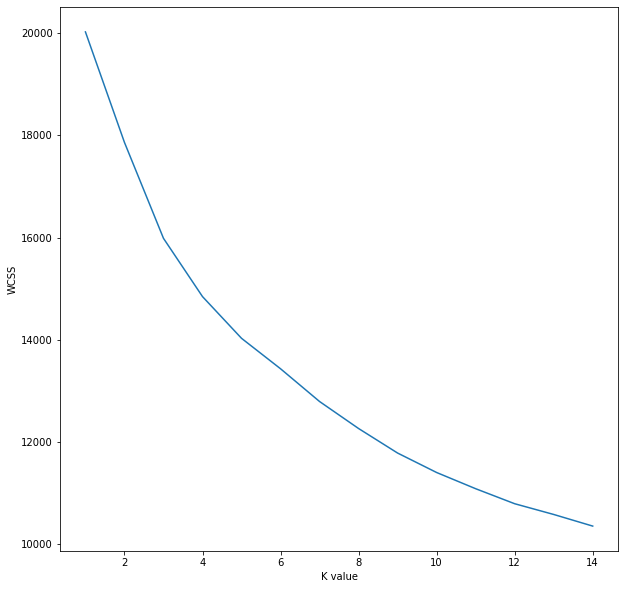

In [17]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [18]:
#So from this it is not very clear the number of Cluster so we move to Silhoutte Score, there is a probable break in 3 or 4

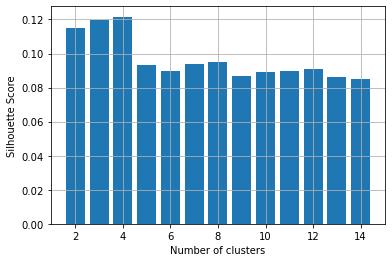

In [19]:
# K- Means Clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


In [20]:
# So the maximum Silhoutre Score can be observed with cluster 4, so we take 4 as number of cluster(0,1,2,3)

In [21]:
kmeans = KMeans(n_clusters = 4)
clusters = kmeans.fit_predict(df)

In [22]:
clusters

array([1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 3, 3, 3, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 1, 2, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2,

In [23]:
df["Cluster"] = clusters

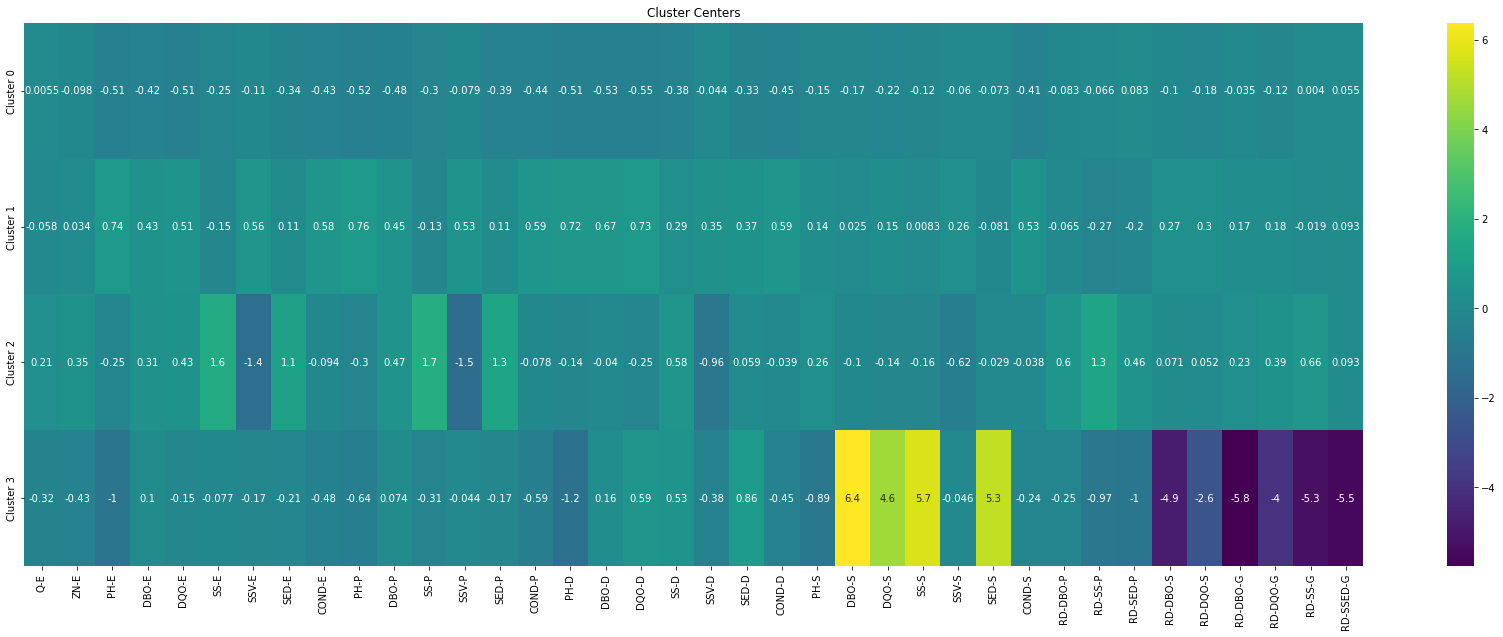

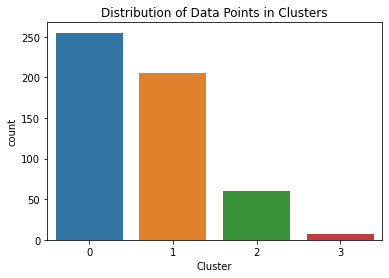

In [24]:
#data visuzulisation of the cluster 
import matplotlib.pyplot as plt
import pandas as pd

centers = kmeans.cluster_centers_
plt.figure(figsize=(30, 10))
sns.heatmap(centers, annot=True, cmap='viridis', yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], xticklabels=df.columns[:-1])
plt.title('Cluster Centers')
plt.show()

sns.countplot(x="Cluster", data=df)
plt.title('Distribution of Data Points in Clusters')
plt.show()



In [25]:
#So we can see that cluster 0 has maximum number of operator followed by 1,2 and 3.

In [26]:
df.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SSED-G,Cluster
0,1.071012,-0.310595,-0.040892,-0.863685,0.003411,-0.452011,0.390030,-0.033405,1.600361,0.308849,...,-0.138767,0.027103,0.550734,0.223813,0.166182,0.176657,0.152272,-0.209163,0.106348,1
1,0.309466,0.236658,-0.447493,-0.863685,0.304427,-0.098300,0.625869,0.714125,2.994449,-0.573338,...,-0.138767,0.175970,0.470505,0.223813,1.114583,0.176657,0.163739,0.379182,0.198832,1
2,-0.709779,0.966329,-0.854094,-0.863685,1.015159,-0.304631,0.682796,-0.444546,0.474952,-0.573338,...,-0.138767,-0.019907,0.562196,0.223813,-1.335454,0.176657,-0.260547,-0.037562,-0.147983,0
3,-0.290682,0.419076,0.365710,0.303397,1.516853,-0.260418,0.333103,-0.033405,2.411467,-0.132244,...,-0.412178,0.450198,0.527812,0.436270,0.368156,0.161917,0.484820,0.072752,0.198832,1
4,-0.005533,-0.310595,0.772311,0.903148,0.747590,-0.378321,0.268044,-0.220287,1.600361,0.308849,...,-0.138767,0.332672,0.562196,0.223813,0.253997,0.441978,0.014666,-0.184649,0.083227,1


In [27]:
# Import in in CSV 
df.to_csv("C:/Users/soukh/Downloads/Data Analytics/water-treatment_Sol.csv")

# Interpretation and Recommendations 

We have told 255 operators in cluster 0, 205 operators in cluster 1, 60 operators in cluster 2 and 7 operators in cluster 3.

So we can see that water treatment is done by following process of Cluster 0 and 1 in most of the operators

Additional info of actual faults would help extend this pipeline to supervised learning of actual faults to refine an overall online model that may predict potential faults in advance to allow time for the operators to plan maintenance or repair to keep the plant running at its plated capacity.